In [1]:
import pickle
import matplotlib.pyplot as plt
from constants import * 

In [2]:
#data0 = pickle.load(open("./valorant_data/data0.pkl", "rb"))
#data1 = pickle.load(open("./valorant_data/data1.pkl", "rb"))
# data2 = pickle.load(open("./valorant_data/data2.pkl", "rb"))
# data3 = pickle.load(open("./valorant_data/data3.pkl", "rb"))
# data6 = pickle.load(open("./valorant_data/data6.pkl", "rb"))
data11 = pickle.load(open("./val_range_data/data11.pkl", "rb"))

In [ ]:
mouse = data2[2][50]
print(mouse[0].union.structure.to_string())

MOUSE_FLAGS (size: 4) instance at 0x000001E813A831D0:
  usButtonFlags: 0
  usButtonData: 0



In [56]:
for i in range(len(data2[2])):
    for j in range(len(data2[2][i])):
        mouse = data2[2][i][j]
        
        if mouse.union.structure.usButtonFlags == 0x0040:
            print(i, j)

85 4
1034 2
1228 5
1497 5
1684 2
1990 3
2046 2
2301 6
2449 2
2644 5
2972 4
3174 0
3254 2
3628 6
3718 4
3846 2
4013 2
4616 2
4809 2
4965 0
5055 1


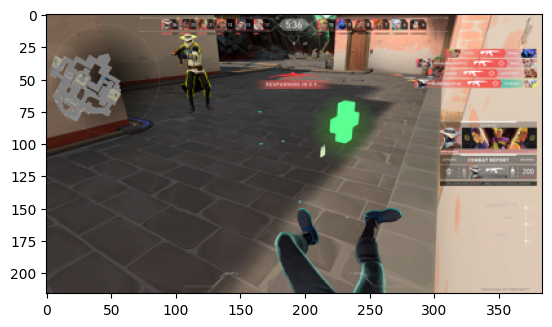

In [57]:
plt.imshow(data2[0][2449])

In [48]:
data2[3][3]

(-1001, 728)

In [4]:
len(data11)

5

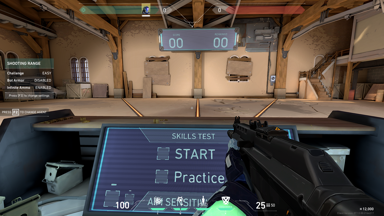

In [9]:
data11[0][2]

In [14]:
frames = []
keyboard_data = []
mouse_data = []
cursor_positions = []
reward = []
for i in range(5000):
    frames.append( data11[0][i])
    keyboard_data.append(data11[1][i])
    mouse_data.append(data11[2][i])
    cursor_positions.append(data11[3][i])
    

In [15]:
data = []
rewards = []
for i in range(1, len(keyboard_data)):
    action = []
    mouse_dx = 0
    mouse_dy = 0
    speed = 0
    
    leftclick = 0
    space = 0
    w = 0
    a = 0
    s = 0
    d = 0
    shift = 0
    ctrl = 0
    
    reward = 0

    for entry in mouse_data[i]:
        mouse_dx += entry.lLastX
        mouse_dy += entry.lLastY
        
        if entry.union.structure.usButtonFlags == 1 and leftclick == 0:
            leftclick = 1
        elif entry.union.structure.usButtonFlags == 2 and leftclick == 0:
            leftclick = -1

        if entry.union.structure.usButtonFlags == 0x0100 and reward == 0:
            reward = 1
        
        if entry.union.structure.usButtonFlags == 0x0040 and reward == 0:
            reward = -1
        

    for entry in keyboard_data[i]:

        if entry[0] == 0x57: # W
            if entry[1] == 1:
                w = -1
            elif entry[1] == 0:
                w = 1

        elif entry[0] == 0x41: # A
            if entry[1] == 1:
                a = -1
            elif entry[1] == 0:
                a = 1

        elif entry[0] == 0x53: # S
            if entry[1] == 1:
                s = -1
            elif entry[1] == 0:
                s = 1

        elif entry[0] == 0x44: # D
            if entry[1] == 1:
                d = -1
            elif entry[1] == 0:
                d = 1

        elif entry[0] == 0x20: # Space
            if entry[1] == 1:
                space = -1
            elif entry[1] == 0:
                space = 1
        
        elif entry[0] == 0xA0: # Shift
            if entry[1] == 1:
                shift = -1
            elif entry[1] == 0:
                shift = 1

        elif entry[0] == 0x11: # Ctrl
            if entry[1] == 1:
                ctrl = -1
            elif entry[1] == 0:
                ctrl = 1
    
    

    # normalize
    mag = (mouse_dx**2 + mouse_dy**2)**0.5
    if mag != 0:
        mouse_dx /= mag
        mouse_dy /= mag
    
    # action.append(mag)
    action.append(mouse_dx)
    action.append(mouse_dy)
    # action.append(w)
    # action.append(a)
    # action.append(s)
    # action.append(d)
    # action.append(space)
    # action.append(shift)
    # action.append(ctrl)
    # action.append(leftclick)
    # rewards.append(reward)
    # action.append(cursor_positions[i+1][0]/1920-0.5)
    # action.append(cursor_positions[i+1][1]/1080-0.5)
    data.append(action)

In [35]:
mouse = data[1]
mouse

[0.0, 0.0, 0, 0, 0, 0, 0, 0, -1, 0]

In [5]:
import torch
from torch import nn
from torchvision import transforms
import numpy as np

In [16]:
labels = np.array(data)

In [48]:
mouse = labels[:, :2]

mean = np.mean(mouse, axis=0)
std = np.std(mouse, axis=0)

# standardize mouse data
mouse = (mouse - np.mean(mouse, axis=0)) / np.std(mouse, axis=0)

# set in label
labels[:, :2] = mouse


In [8]:
labels[:, 0].max()

1.0

In [8]:
# normalize speed by max
labels[:, 0] = labels[:, 0] / 750

In [47]:
mouse[400]

array([-0.34613414,  0.30172426])

In [59]:
labels[400]

array([ 0.04638007, -0.9486833 ,  0.31622777,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

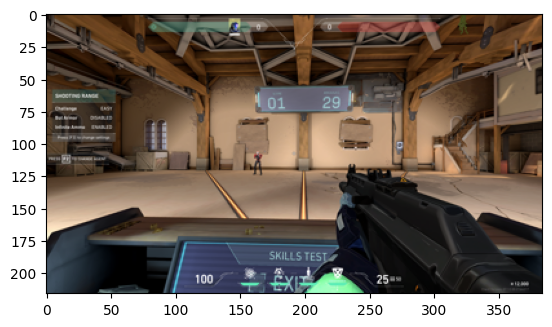

In [36]:
plt.imshow(frames[100])

In [7]:
import cv2

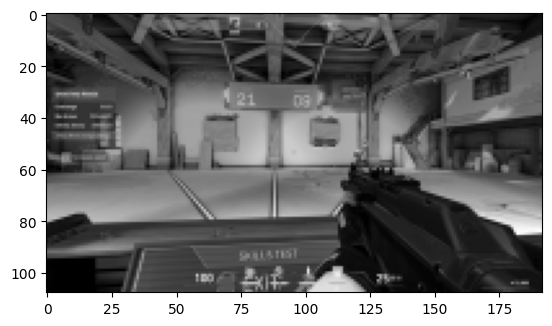

In [47]:
img = np.array(frames[903])
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img, cmap='gray')

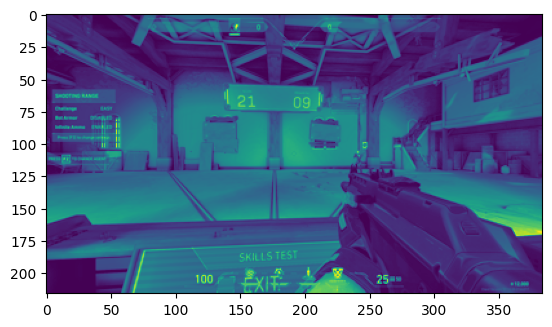

In [37]:
img = np.array(frames[903])
# plot red channel
plt.imshow(img[:,:,2])

In [32]:
img[:, :, 0]

array([[ 98, 105, 111, ...,  42,  40,  39],
       [ 49,  59,  91, ...,  34,  36,  37],
       [ 59,  43,  53, ...,  53,  54,  54],
       ...,
       [ 60,  58,  53, ...,  15,  15,  17],
       [ 60,  56,  51, ...,  16,  15,  15],
       [ 58,  55,  50, ...,  18,  17,  15]], dtype=uint8)

In [ ]:
img

In [ ]:
bruh = np.array(frames[10])


In [17]:

# gray scale each image
for i in range(0, 5000):
    # convert from PIL image to cv2 image
    img = np.array(frames[i], dtype=np.float32)

    # # scale down by 2
    img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)
    
    # red channel only
    img = img[:,:,0]

    # threshold red channel
    #print()
    #img[img[:, :, 0] < .75, 0] = 0.0


    #img = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)[1]

    # # # canny edge detection
    # # img = cv2.Canny(img, 100, 200)
    
    # # new_frames.append(img)
    print(i, end='\r')
    frames[i] = img

    # 0 - 1
    frames[i] = frames[i] / 255


In [120]:
frames[0].max()

1.0

In [18]:
frames[0].shape

(216, 384)

In [27]:
len(frames)

5002

In [39]:
frames[100][115][ 160][0]

179

In [53]:
#frames[100][100:125]

In [16]:
frames[0].dtype

dtype('float16')

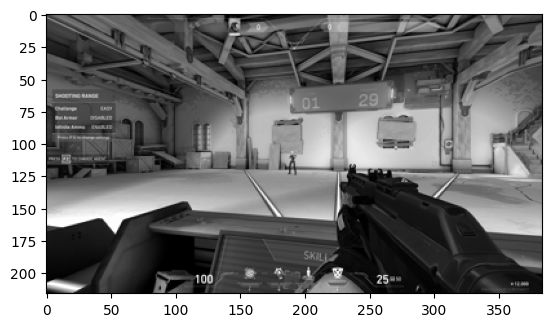

In [15]:
plt.imshow(frames[107], cmap='gray')

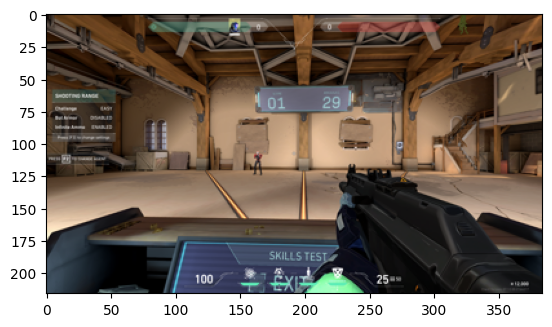

In [118]:
# plot a frame 
bruh = np.array(frames[100])
#bruh = cv2.resize(np.array(frames[100]), (0,0), fx=0.5, fy=0.5)
#bruh = bruh/255
# find red
#bruh[(bruh[:, :, 0] > .6) & (bruh[:, :, 1] < .5) & (bruh[:, :, 2] < .5)] = 1.0
#bruh = cv2.Canny(bruh, 200, 300)
#print(bruh[55, 84])
#print(bruh.shape)
plt.imshow(bruh)

In [7]:
labels.shape

(14393, 10)

In [74]:
len(frames)

9066

In [24]:
import torch.nn.functional as F

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.relu = nn.ReLU()
        self.downsample = None
        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
            )

    def forward(self, x):
        residual = x

        out = self.conv1(x)

        if self.downsample is not None:
            residual = self.downsample(x)

        butt =  out + residual
        butt = self.relu(butt)

        return butt

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.convs = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),
            nn.ReLU(),
            ResidualBlock(64, 64),
            nn.MaxPool2d(2),
            ResidualBlock(64, 64),
            nn.MaxPool2d(2),
            ResidualBlock(64, 128),
            nn.MaxPool2d(2),
            ResidualBlock(128, 128),
            nn.MaxPool2d(2),
            ResidualBlock(128, 128),
            nn.MaxPool2d(2),
            ResidualBlock(128, 64),
        )

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(384, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
        )

        self.fc2 = nn.Sequential(
            nn.Linear(64, 15),
            nn.ReLU(),
            nn.Linear(15, 11)
        )

    def forward(self, input):
        x = self.convs(input)
        x = self.fc(x)
        x = self.fc2(x)
        return x

In [25]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.convs = nn.Sequential(
            nn.Conv2d(1, 64, 3, padding=1),
            nn.LeakyReLU(),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.LeakyReLU(),
            nn.MaxPool2d(2),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.LeakyReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.LeakyReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.LeakyReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.LeakyReLU(),
            nn.MaxPool2d(2),
        )

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(384, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.Linear(256, 128),
            nn.Linear(128, 64),
        )

        self.fc2 = nn.Sequential(
            nn.Linear(64, 15),
            nn.Linear(15, 2)
        )


    def forward(self, input):
        x = self.convs(input)

        #print(x.shape, cursor_position.shape)
        x = self.fc(x)
        x = self.fc2(x)
        return x

In [ ]:
# weight initialization
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)
    if type(m) == nn.Conv2d:
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

In [26]:
net = Net()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
loss = nn.MSELoss()

In [15]:
# remove 8 from labels
labels = labels[:, 1:3]

In [20]:
labels.shape

(4999, 2)

In [27]:
frames = np.array(frames, np.float32)
labels = np.array(labels, dtype=np.float32)

In [21]:
losses = []

In [36]:
1000//16

62

In [21]:
BATCH_SIZE = 16

In [29]:
net = net.to('cuda')
loss = loss.to('cuda')

In [49]:
frames.shape

(1000, 216, 384)

In [31]:
losses = []

In [51]:
frames.mean()

0.35945523

In [33]:
print("                                              ", end="\r")
for epoch in range(750):
    for i in range(62):
        #img = frames[903]
        #label = labels[903]

        img = frames[i*BATCH_SIZE:i*BATCH_SIZE+BATCH_SIZE]
        label = labels[i*BATCH_SIZE:i*BATCH_SIZE+BATCH_SIZE]
        #print(img.shape, label.shape)
        #print(img.shape)
        # img = torch.tensor(img).unsqueeze(0).permute(0, 3, 1, 2)
        # label = torch.tensor(label).unsqueeze(0)
        img = torch.tensor(img).unsqueeze(1)
        label = torch.tensor(label)
        #print(img.shape)

        # move to cuda
        img = img.to('cuda')
        label = label.to('cuda')
        # print(label.shape)
        output = net(img)
        
        
        l = loss(output, label)

        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        losses.append(l.item())
        # for name, param in net.named_parameters():
        #     if param.grad is not None:
        #         print(f'Layer: {name}, Mean Gradient: {param.grad.mean().item()}')

        # # average loss of past 100
        if len(losses) > 100:
            losses.pop(0)
        avg_loss = sum(losses) / len(losses)
        #print(epoch, i, l.item()*100, end="\r")
        print(epoch, i, l.item()*100, avg_loss*100, end="\r")

KeyboardInterrupt: 

In [63]:
torch.save(net.state_dict(), './valorant_models/val7.pt')

In [40]:
i = 903
img = frames[i]
img = torch.tensor(img).unsqueeze(0).unsqueeze(0)
print(img.shape)
img = img.to('cuda')
output = net(img)
output = output.squeeze().detach().cpu().numpy()
print(output)
print(labels[i])


torch.Size([1, 1, 108, 192])
[-0.01362864  0.00271778]
[0.99992263 0.01244072]
